In [33]:
import os
import glob
import gzip
import pickle
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

import networkx as nx

from tsvar.preprocessing import Dataset

In [34]:
data_dir = '../../../data/memetracker/'

events = list()
for i in range(100):
    fname = os.path.join(data_dir, f'process_{i:03d}_full.pkl.gz')
    with gzip.open(fname,'rb') as f:
        process_arr = pickle.load(f)
        events.append(process_arr.astype(float))
        
metadata = pd.read_csv('../../../data/memetracker/top_100.csv')
idx_to_name = dict(zip(metadata.index, metadata.url))

with gzip.open('../../../data/memetracker/true_G.pkl.gz', 'rb') as f:
    adj_true = pickle.load(f)
graph = nx.DiGraph(adj_true)

In [36]:
print(f'Number of dimensions: {len(events):d}')
print(f'    Number of events: {sum(map(len,events)):,d}')

Number of dimensions: 100
    Number of events: 21,202,211


In [37]:
dataset = Dataset.from_data(events, idx_to_name, graph, timescale=1.0)
dataset.end_time = max(map(max, dataset.timestamps))

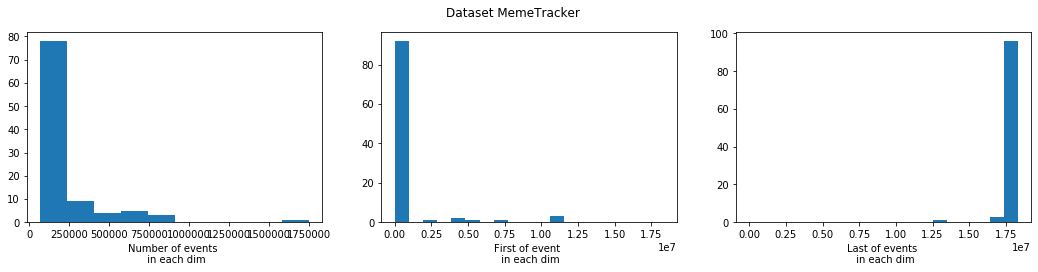

In [38]:
fig, axs = plt.subplots(1, 3, figsize=(18, 3.5))

axs[0].hist(list(map(len, dataset.timestamps)))
axs[0].set_xlabel('Number of events \n in each dim')

end_time = dataset.end_time
axs[1].hist(list(map(min, dataset.timestamps)), bins=np.linspace(0, end_time, 20))
axs[1].set_xlabel('First of event \n in each dim')

axs[2].hist(list(map(max, dataset.timestamps)), bins=np.linspace(0, end_time, 20))
axs[2].set_xlabel('Last of events \n in each dim')

fig.suptitle(f"Dataset MemeTracker");